# Лекция 9. Парсинг: извлечение данных из веб-страниц

Привет, друзья! Сегодняшняя лекция посвящена такой важной теме как извлечение данных из веб-страниц. Он же парсинг, он же скрейпинг, он же краулинг. Мы с вами вкратце поговорим про то, как устроен интернет, и что такое клиент-серверное взаимодействие, познакомимся с протоколом HTTP, посмотрим на язык разметки HTML и наконец подружим это все в Python, чтобы вы могли с помощью кода получить данные с какой-нибудь веб-страницы.

_Зачем вообще это все?_

Зачастую данные, которые необходимы вам для анализа, не подготовлены в виде CSV-файликов, а ресурс, где их можно найти, не обладает открытым и понятным API (что это такое, мы с вами еще поговорим), но информацию получить все равно хочется. И тут на помощь приходят инструменты для парсинга – мы можем написать такую программу, которая будет быстро получать данные с веб-страницы и каким-то образом обрабатывать их, чтобы в дальнейшем с ними можно было удобно работать.

## Клиент-серверное взаимодействие или как устроен интернет

На этом этапе мы не будем погружаться в чертоги разума, чтобы детально разобраться, как же устроен этот самый интернет. Пока нам достаточно будет понять, что же такое клиенты и серверы, и как они между собой взаимодействуют. Представьте, что вы через браузер на своем компьютере открываете какую-нибудь страницу – например, facebook.com. Ваш браузер в данном случае выступает в качестве _клиента_ – он посылает запрос на _сервер_ и ожидает, что тот отдаст ему какую-то информацию.

Сервер принимает запрос вашего браузера, делает какую-то магию (например, формирует ленту из публицкаций, которые вы еще не видели) и отдает вам какие-то данные. К примеру, HTML разметку той самой странички на facebook.com.

_На самом деле все устроено немного сложнее, но принцип именно такой: клиент запрашивает у сервера какую-то информацию, а сервер ее подготавливает и возвращает клиенту. Бывает и так, что клиент просит сервер записать какую-то информацию, например, сохранить свеженький пост, который вы только что написали, а сервер получает эту информацию и записывает к себе._


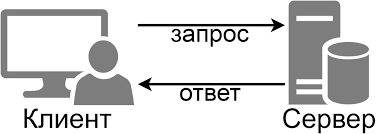

### Протокол HTTP

На каком языке общаются клиенты и серверы? Люди, которые придумывали интернет, разработали множество правил, по которым компьютеры могут общаться между собой. Эти правила принято называть _протоколами_. Существует огромное количество разных протоколов (HTTP, TCP, FTP, SMTP, AMQP и так далее), а еще они бывают различных уровней. Для нас пока важно знать, что существует протокол `HTTP` – Hypertext Transfer Protocol или Протокол Передачи Гипертекста. То есть такого текста, который может в себе содержать ссылки на другие ресурсы в сети интернет.

_Большинство_ запросов в интернете отправляются именно по протоколу HTTP. Разбираться в этом можно очень долго, но пока давайте запомним, что у протокола HTTP есть два самых распространенных способа (метода) доступа к веб-страницам – `GET` и `POST`. На самом деле методов больше, но именно эти два используются чаще всего. `GET` применяется, когда нам нужно получить какие-то данные с сервера – например, загрузить ленту новостей в facebook.com. А `POST` используется, когда мы хотим сохранить что-то на сервере – например, запостить фоточку в инстаграм.

С помощью Python мы можем написать программу, которая будет отправлять эти самые HTTP-запросы. Для этого удобнее всего использовать библиотеку `requests`.

In [1]:
import requests

Если код выше у вас не выполнился и упал с ошибкой, значит у вас не установлена библиотека `requests`. Установить ее можно с помощью команды `pip3 install requests`.

Давайте отправим GET-запрос к странице Википедии про протокол HTTP – `https://ru.wikipedia.org/wiki/HTTP`.

In [4]:
r = requests.get('https://ru.wikipedia.org/wiki/HTTP')
r

<Response [200]>

Теперь в `r` лежит объект `Response`, с которым мы дальше можем что-то сделать. У HTTP-ответа есть код, который говорит нам о том, успешно ли сервер обрабаотал наш запрос. Этих самых кодов существует очень много, но самый главный из них – код 200. Он говорит нам о том, что все прошло успешно. Мы можем проверить код.

In [5]:
r.status_code

200

Или сделать еще проще – вызвать `r.ok`. Если получим `True`, значит запрос выполнен успешно, если `False` – нет.

In [6]:
r.ok

True

Давайте проверим это, сделав запрос к несуществующей веб-странице

In [9]:
r = requests.get('https://ru.wikipedia.org/wiki/HTTPRR')
r.ok

False

## Язык разметки HTML

По протоколу HTTP сервер передает нам некий текст. А что там за текст такой? Давайте посмотрим...

In [11]:
r = requests.get('https://ru.wikipedia.org/wiki/HTTP')
print(r.text)

<!DOCTYPE html>
<html class="client-nojs" lang="ru" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>HTTP — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"X-SesgpAMM8AA01AK@0AAADL","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"HTTP","wgTitle":"HTTP","wgCurRevisionId":111457598,"wgRevisionId":111457598,"wgArticleId":935,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Статьи с некорректным использованием шаблонов:Cite web (не указан язык)",
"Википедия:Статьи с некорректным использованием шаблонов:Cite web (указан неверный параметр)","ПРО:ИТ:Статьи по алфавиту","ПРО

Какая-то белиберда и треугольные скобочки. На самом деле это запрошенная нами страница в формате `HTML`.

`HTML` – HyperText Markup Language или Язык разметки гипертекста – специальный язык, на котором написаны веб-страницы. Браузер, через который вы делаете запрос, понимает этот язык и вместо текста рисует красивые странички в соответствие с правилами, которые в нем описаны.

`HTML` является частным случаем языка разметки `SGML` и состоит из так называемых тегов. Теги это вот эти штуки в треугольных скобках – `<html>`, `<head>`, `<body>`, `<div>` и так далее. У каждого тега есть свое предназначение. Например, тег `<title>` обозначает заголовок страницы, `<p>` – параграф, `<a>` – ссылку, `<img>` – картинку.

Теги бывают открывающие – `<title>`, и закрывающие – `</title>`. Все, что находится _между ними_ и будет в данном случае заголовком веб-страницы. Если тег открылся, то он _обязательно_ должен закрыться.

Из таких тегов и состоит веб-страница – можно сказать, что она представляет собой _дерево_, с корнем в теге `<html>`, у которого есть потомки.

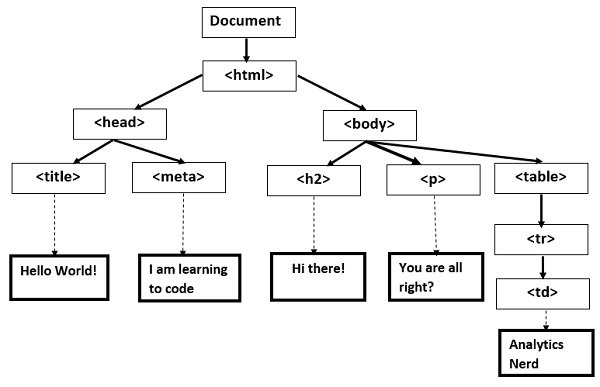

Мы и сами можем написать простенькую веб-страницу. Вставьте этот текст в блокнот и сохраните с расширением `.html`, а затем откройте через браузер.

```
<!DOCTYPE html>
<html lang='en'>
<head>
  <title>My first web-page!</title>
</head>
<body>
  <h1>Hello there!</h1>
  <p>This is my first web-page!</p>
  <hr>
  <ol>
    <li>One</li>
    <li>Two</li>
    <li>Three</li>
  </ol>
  <font color='red'>That's all!</font>
</body>
</html>
```

Ваш бразуер распознает HTML и нарисует для вас веб-страницу.

_Пару слов об атрибутах_. У тегов есть так называемые атрибуты, можно сказать, что это свойства тегов. Они тоже пишутся внутри треугольных скобок. Например у тега `<font color='red'>That's all!</font>` атрибут `color` имеет значение `"red"`, что означает, что текст будет напечатан красным цветом.

На примере нашей простой веб-странички мы можем посмотреть, как устроено дерево тегов. В корне дерева находится тег `<html>`, его потомками являются `<head>` и `<body>`. В потомках у `<head>` есть `<title>`, а у `<body>` – `<h1>` и так далее.

На самом деле тегов не так много, но запомнить их все сразу непросто, однако всегда можно воспользоваться [вот этой шпаргалкой](https://html5book.ru/examples/html-tags.html).

## BeautifulSoup и разбор веб-страниц

Язык разметки HTML на данным этапе нас интересует с точки зрения разбора веб-страниц и извлечения из них какой-либо информации. Для этого существуют разные инструменты, один из самых удобных – библиотека `Beautiful Soup 4`. Давайте разберемся, как с ней работать.

Но для начала нужно ее импортировать. Здесь все немного странно – нам нужно использовать именно четвертую версию библиотеки, а называется она `bs4`. Ну это чтобы совсем запутаться :)

Если у вас код ниже вызывает ошибку, необходимо установить библиотеку – `pip3 install bs4`.

In [13]:
from bs4 import BeautifulSoup

Давайте, например, получим список всех ссылок на страницы Википедии, которые выводятся при поиске по слову `http` – [вот эта страница](https://ru.wikipedia.org/w/index.php?search=http&title=%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%9F%D0%BE%D0%B8%D1%81%D0%BA&profile=advanced&fulltext=1&advancedSearch-current=%7B%7D&ns0=1).

In [15]:
url = 'https://ru.wikipedia.org/w/index.php?search=http&title=%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%9F%D0%BE%D0%B8%D1%81%D0%BA&profile=advanced&fulltext=1&advancedSearch-current=%7B%7D&ns0=1'

r = requests.get(url)
r.ok

True

Страница успешно загружена. Теперь преобразуем текст веб-страницы в специальный объект BeautifulSoup.

In [19]:
soup = BeautifulSoup(r.text)
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>Поиск «http» — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"X-y-yQpAMM4AA4vQLdYAAACR","wgCSPNonce":!1,"wgCanonicalNamespace":"Special","wgCanonicalSpecialPageName":"Search","wgNamespaceNumber":-1,"wgPageName":"Служебная:Поиск","wgTitle":"Поиск","wgCurRevisionId":0,"wgRevisionId":0,"wgArticleId":0,"wgIsArticle":!1,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"ru","wgPageContentModel":"wikitext","wgRelevantPageName":"Служебная:Поиск","wgRelevantArticleId":0,"wgIsProbablyEditable":!1,"wgRelevantPageIsProbablyEditable":!1,"wgF

На первый взгляд это просто текст, но на самом деле – специальный объект BeautifulSoup. И с его помощью можно выполнять поиск по тегам, которые содержит веб-страница.

In [24]:
soup.html.head

<head>
<meta charset="utf-8"/>
<title>Поиск «http» — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"X-y-yQpAMM4AA4vQLdYAAACR","wgCSPNonce":!1,"wgCanonicalNamespace":"Special","wgCanonicalSpecialPageName":"Search","wgNamespaceNumber":-1,"wgPageName":"Служебная:Поиск","wgTitle":"Поиск","wgCurRevisionId":0,"wgRevisionId":0,"wgArticleId":0,"wgIsArticle":!1,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"ru","wgPageContentModel":"wikitext","wgRelevantPageName":"Служебная:Поиск","wgRelevantArticleId":0,"wgIsProbablyEditable":!1,"wgRelevantPageIsProbablyEditable":!1,"wgFlaggedRevsParams":{
"tags":{"accuracy":{"levels":3,"quality":2,"

In [25]:
soup.html.head.title

<title>Поиск «http» — Википедия</title>

Впрочем, поскольку тег `<title>` встречается на странице только один раз, можно не писать дерево обращений полностью, а сразу написать `soup.title`.

In [26]:
soup.title

<title>Поиск «http» — Википедия</title>

На самом деле разбирать глазами код веб-страницы через Python не очень-то удобно. Для этого можно воспользоваться консолью разработчика в браузере – это гораздо приятнее и быстрее.

Через консоль мы видим, что интересующие нас теги расположены внутри тега `<ul>`, который обозначает неупорядоченный список с атрибутом `class="mw-search-results"`. Давайте попробуем его найти, для этого в BeautifulSoup есть специальный метод `find`, с помощью которого мы ищем все теги `ul`, у которых значение атрибута `class` равно `mw-search-results`.

_Обратите внимание на аргумент `class_` с нижним подчеркиванием. Оно нужно, потому что слово `class` без подчеркивания является в Python ключевым и уже занято._

In [39]:
search_result = soup.find('ul', class_='mw-search-results')
search_result

<ul class="mw-search-results"><li class="mw-search-result"><div class="mw-search-result-heading"><a data-serp-pos="0" href="/wiki/HTTP" title="HTTP"><span class="searchmatch">HTTP</span></a> </div><div class="searchresult"><span class="searchmatch">HTTP</span> (англ. HyperText Transfer Protocol — «протокол передачи гипертекста») — протокол прикладного уровня передачи данных, изначально — в виде гипертекстовых</div> <div class="mw-search-result-data">77 Кб (5327 слов) - 22:01, 2 января 2021</div></li><li class="mw-search-result"><div class="mw-search-result-heading"><a data-serp-pos="1" href="/wiki/Cookie" title="Cookie">Cookie</a> <span class="searchalttitle">(перенаправление с <a class="mw-redirect" href="/wiki/HTTP-Cookies" title="HTTP-Cookies"><span class="searchmatch">HTTP</span>-Cookies</a>)</span> </div><div class="searchresult">соответствующего сайта пересылает этот фрагмент данных веб-серверу в составе <span class="searchmatch">HTTP</span>-запроса. Применяется для сохранения да

Но нам на самом деле нужны именно элементы этого списка, то есть теги `<li>` со значением класса `mw-search-result`. Давайте их получим.

In [42]:
li_list = search_result.find_all('li', class_='mw-search-result')
len(li_list)

20

Теперь у нас есть список из 20 элементов `<li>` (на самом не деле не совсем список, а специальный объект BeautifulSoup). Мы можем обратиться к первому элементу, чтобы посмотреть, как он устроен.

In [43]:
li_list[0]

<li class="mw-search-result"><div class="mw-search-result-heading"><a data-serp-pos="0" href="/wiki/HTTP" title="HTTP"><span class="searchmatch">HTTP</span></a> </div><div class="searchresult"><span class="searchmatch">HTTP</span> (англ. HyperText Transfer Protocol — «протокол передачи гипертекста») — протокол прикладного уровня передачи данных, изначально — в виде гипертекстовых</div> <div class="mw-search-result-data">77 Кб (5327 слов) - 22:01, 2 января 2021</div></li>

Отлично – внутри тега `<li>` есть тег `<a>` с атрибутом `href` – именно тут и хранятся ссылки, которые мы хотим вытянуть. Давайте это сделаем.

In [49]:
links = []

for i, li in enumerate(li_list):
    a = li.a # получаем тег <a>
    href = a['href'] # получаем значение атрибута href
    url = 'https://ru.wikipedia.org/' + href # поскольку ссылки относительные, прибавляем значение основного домена
    
    links.append(url) # кладем ссылку в список

Посмотрим теперь, что получилось

In [50]:
links

['https://ru.wikipedia.org//wiki/HTTP',
 'https://ru.wikipedia.org//wiki/Cookie',
 'https://ru.wikipedia.org//wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP',
 'https://ru.wikipedia.org//wiki/POST_(HTTP)',
 'https://ru.wikipedia.org//wiki/HTTP/2',
 'https://ru.wikipedia.org//wiki/HTTP_referer',
 'https://ru.wikipedia.org//wiki/Apache_HTTP_Server',
 'https://ru.wikipedia.org//wiki/HTTP/3',
 'https://ru.wikipedia.org//wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B7%D0%B0%D0%B3%D0%BE%D0%BB%D0%BE%D0%B2%D0%BA%D0%BE%D0%B2_HTTP',
 'https://ru.wikipedia.org//wiki/%D0%92%D0%B5%D0%B1-%D1%81%D0%B5%D1%80%D0%B2%D0%B5%D1%80',
 'https://ru.wikipedia.org//wiki/HTTP_301',
 'https://ru.wikipedia.org//wiki/HTTP_ETag',
 'https://ru.wikipedia.org//wiki/%D0%97%D0%B0%D0%B3%D0%BE%D0%BB%D0%BE%D0%B2%D0%BA%D0%B8_HTTP',
 'https://ru.wikipedia.org//wiki/HTTP-%D1%84%D0%BB%D1%83%D0%B4',
 'https://ru.wikipedia.org//wiki/HTTP_File_S

Таким образом мы получили список всех ссылок!

Здорово, в дальнейшем мы еще потренируемся и будем писать более сложные парсеры, а на сегодня – достаточно :)

## Дополнительные материалы

1. [Основы HTML](https://html5book.ru/osnovy-html/)
2. [Про протокол HTTP простым языком](https://habr.com/ru/post/215117/)
3. [Официальная документация BeaufiulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html)